# Исходные данные
Даны три наблюдения случайного вектора 
(ξ,η,ω):
(1,0,1)
(0,1,5)
(1,1,2)



a) Линейная регрессия 
ω=aξ+bη

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Данные
X = np.array([[1, 0], [0, 1], [1, 1]])
y = np.array([1, 5, 2])

# Модель линейной регрессии
model = LinearRegression().fit(X, y)

# Коэффициенты
a, b = model.coef_
intercept = model.intercept_

print(f"Уравнение регрессии: ω = {a:.2f}ξ + {b:.2f}η + {intercept:.2f}")

Уравнение регрессии: ω = -3.00ξ + 1.00η + 4.00


b) Ridge регрессия 
ω=aξ+bη

Ridge уравнение: ω = -2.9934ξ + 1.0013η
Оптимальный alpha: 0.0013


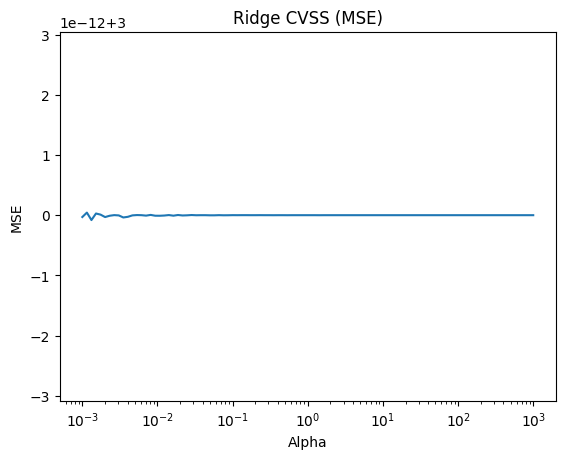

In [6]:
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV
import matplotlib.pyplot as plt

# Данные
X = np.array([[1, 0], [0, 1], [1, 1]])
y = np.array([1, 5, 2])

# Уменьшаем количество фолдов для кросс-валидации
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=2, scoring='neg_mean_squared_error').fit(X, y)

# Оптимальные параметры
best_alpha = ridge_cv.alpha_
a_ridge, b_ridge = ridge_cv.coef_

print(f"Ridge уравнение: ω = {a_ridge:.4f}ξ + {b_ridge:.4f}η")
print(f"Оптимальный alpha: {best_alpha:.4f}")

# Ручной расчет CVSS
alphas = np.logspace(-3, 3, 100)
mse_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # Используем кросс-валидацию с 2 фолдами и MSE вместо R²
    scores = -cross_val_score(ridge, X, y, cv=2, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(scores))

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge CVSS (MSE)')
plt.show()

c) Lasso регрессия 
ω=aξ+bη

/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Lasso уравнение: ω = -1.10ξ + 0.00η
Оптимальный alpha: 0.53


/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/mvshifrin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

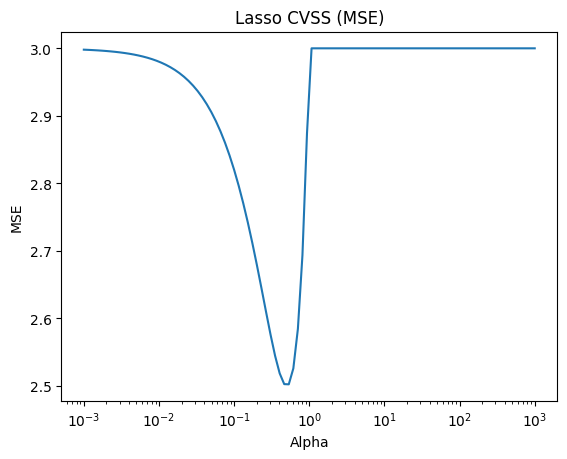

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Данные
X = np.array([[1, 0], [0, 1], [1, 1]])
y = np.array([1, 5, 2])

# Масштабирование данных (важно для Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Параметры для LassoCV
alphas = np.logspace(-3, 1, 100)  # Уменьшил диапазон alpha
lasso_cv = LassoCV(
    alphas=alphas,
    cv=2,  # Всего 2 фолда для 3 наблюдений
    max_iter=10000,  # Увеличил количество итераций
    tol=1e-4,  # Увеличил допуск сходимости
    random_state=42
).fit(X_scaled, y)

# Оптимальные параметры
best_alpha = lasso_cv.alpha_
a_lasso, b_lasso = lasso_cv.coef_

print(f"Lasso уравнение: ω = {a_lasso:.2f}ξ + {b_lasso:.2f}η")
print(f"Оптимальный alpha: {best_alpha:.2f}")

# График MSE по alpha
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), 'b-')
plt.axvline(best_alpha, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso CVSS (MSE)')
plt.show()